<a href="https://colab.research.google.com/github/Ayushi-priya/Machine-Learning/blob/main/HeartFailurePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Importing Dataset**

In [ ]:
dataset = pd.read_csv('heart.csv')

In [ ]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
dataset.shape

(918, 12)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
print(x)

[[40 'M' 'ATA' ... 'N' 0.0 'Up']
 [49 'F' 'NAP' ... 'N' 1.0 'Flat']
 [37 'M' 'ATA' ... 'N' 0.0 'Up']
 ...
 [57 'M' 'ASY' ... 'Y' 1.2 'Flat']
 [57 'F' 'ATA' ... 'N' 0.0 'Flat']
 [38 'M' 'NAP' ... 'N' 0.0 'Up']]


In [ ]:
print(y)

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 

#**Data Preprocessing**

##Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le6 = LabelEncoder()
le8 = LabelEncoder()
le10 = LabelEncoder()
x[:,1] = le1.fit_transform(x[:,1])
x[:,2] = le2.fit_transform(x[:,2])
x[:,6] = le6.fit_transform(x[:,6])
x[:,8] = le8.fit_transform(x[:,8])
x[:,10] = le10.fit_transform(x[:,10])

In [ ]:
print(x)

[[40 1 1 ... 0 0.0 2]
 [49 0 2 ... 0 1.0 1]
 [37 1 1 ... 0 0.0 2]
 ...
 [57 1 0 ... 1 1.2 1]
 [57 0 1 ... 0 0.0 1]
 [38 1 2 ... 0 0.0 2]]


In [ ]:
print(y)

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 

<ipython-input-17-958be37a833c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

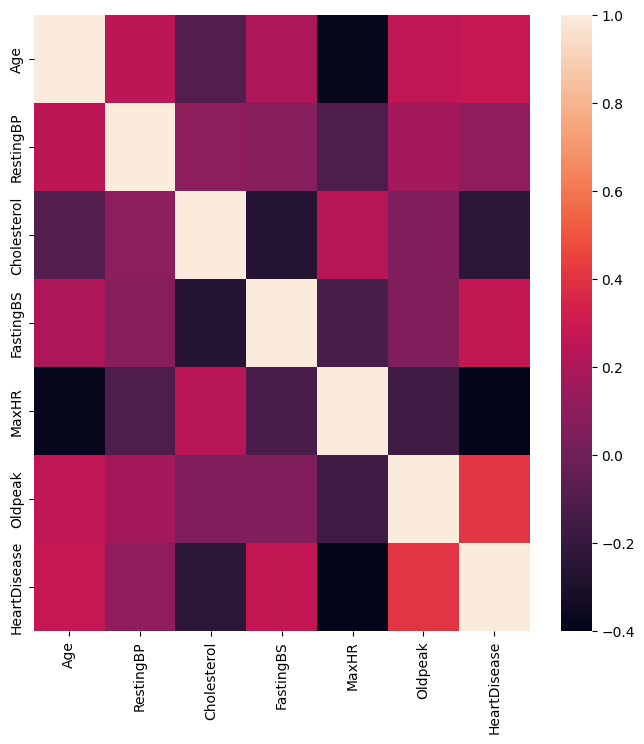

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(dataset.corr())

#**Splitting Dataset into Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1,random_state=0)

#**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
print(X_test)

[[ 0.29358644  0.47609523 -0.77042036 ... -0.80178373 -0.71763263
  -0.67675931]
 [ 1.43193695  0.47609523 -0.77042036 ... -0.80178373 -0.43748185
  -0.67675931]
 [-0.12035919  0.47609523 -0.77042036 ... -0.80178373 -0.81101623
  -0.67675931]
 ...
 [-0.01687278  0.47609523  1.34536093 ... -0.80178373 -0.34409825
   1.15447177]
 [-1.05173688 -2.10042013 -0.77042036 ... -0.80178373 -0.25071465
  -0.67675931]
 [ 0.29358644  0.47609523 -0.77042036 ...  1.24721913 -0.06394746
  -0.67675931]]


#**Training Dataset**
##Training with Random Forest Classifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_randomforest = RandomForestClassifier()
model_randomforest.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_decision = DecisionTreeClassifier()
model_decision.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train,Y_train)

SVC()

In [ ]:
predictions=model_svm.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

[[33  7]
 [ 3 49]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.88      0.94      0.91        52

    accuracy                           0.89        92
   macro avg       0.90      0.88      0.89        92
weighted avg       0.89      0.89      0.89        92

0.8913043478260869


#**Making Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [ ]:
y_pred_logistic = model_logistic.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_decision = model_decision.predict(X_test)
y_pred_random = model_randomforest.predict(X_test)

In [ ]:
RandomForest_Accuracy = accuracy_score(Y_test,y_pred_random)
LogisticRegression_Accuracy = accuracy_score(Y_test,y_pred_logistic)
SVM_Accuracy = accuracy_score(Y_test,y_pred_svm)
Decision_Accuracy = accuracy_score(Y_test,y_pred_decision)

Text(0, 0.5, 'Accuracy')

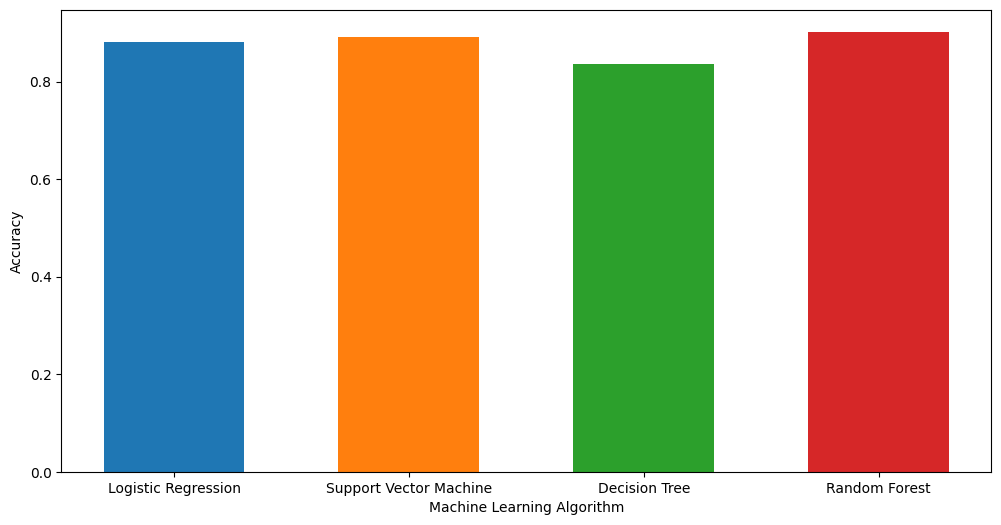

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar("Logistic Regression",LogisticRegression_Accuracy,width=0.6)
plt.bar("Support Vector Machine",SVM_Accuracy,width=0.6)
plt.bar("Decision Tree",Decision_Accuracy,width=0.6)
plt.bar("Random Forest",RandomForest_Accuracy,width=0.6)
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy")

In [ ]:
print("Logistic Regression Accuracy: ",LogisticRegression_Accuracy*100)
print("SVM Accuracy: ",SVM_Accuracy*100)
print("Decision Tree Accuracy: ",Decision_Accuracy*100)
print("RandomForest Accuracy: ",RandomForest_Accuracy*100)

Logistic Regression Accuracy:  88.04347826086956
SVM Accuracy:  89.13043478260869
Decision Tree Accuracy:  83.69565217391305
RandomForest Accuracy:  90.21739130434783


#**Single Prediction**
###age=40,Sex=M,chestpain = NAP,RestingBP=110,cholestrol=290,FastingBS=1,Resting ECG=ST,MaxHR=160,Exercise Angina=Y,oldpeak=2.2,ST_slope=Flat

In [ ]:
result = model_randomforest.predict(sc.transform([[40,1,2,110,290,1,2,160,0,2.2,1]]))
if result == [0]:
    print('Person Not Having Heart Disease')
else:
    print("Person Having Heart Disease")

Person Not Having Heart Disease


In [ ]:
result = model_randomforest.predict(sc.transform([[22,0,2,110,200,1,2,160,0,2.2,1]]))
if result == [0]:
    print('Person Not Having Heart Disease')
else:
    print("Person Having Heart Disease")

Person Not Having Heart Disease
